
# Car Price Prediction
This notebook demonstrates a comprehensive approach to predicting car prices using machine learning techniques. 

## Objectives
1. Explore and preprocess the dataset.
2. Perform exploratory data analysis (EDA).
3. Build and evaluate machine learning models for predicting car prices.

### Steps Covered:
- Data Loading and Inspection
- Data Cleaning and Preprocessing
- Exploratory Data Analysis (EDA)
- Model Training and Evaluation

---


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Loading DataSet

In [2]:
# read from csv file using pandas
df = pd.read_csv("../data/Cars.csv")

# print the first 4 rows of dataframe
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [3]:
# shape of our data (rows, columns)
df.shape

(8128, 13)

In [4]:
# inspect types of columns and oher infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# describes the statistics of the int/real numbers
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
### Here we have five values of owner, we convert them to 1 to 5 with
### First Owner as 1, Second as 2 ans so on manually since LabelEncoder is not that flexible to do so.

owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df["owner"] = df["owner"].map(owner_mapping)

In [7]:
# original fuel columns and its contents
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [8]:
# Removing rows with fuel LPG or CNG.
df = df[~df['fuel'].isin(['LPG', 'CNG'])]
df["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [9]:
# Striping kmpl from mileage and converting it into float
df['mileage'] = df['mileage'].astype(str).str.replace('kmpl', '').str.strip().astype(float)
df["mileage"].head(5)

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [10]:
# Removing CC from engine column and converting to float.
df['engine'] = df['engine'].astype(str).str.replace('CC', '').str.strip().astype(float)
df["engine"].head(5)

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [11]:
# replacing bhp from max power
df['max_power'] = df['max_power'].astype(str).str.replace('bhp', '').str.strip().astype(float)
df["max_power"].head(5)

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [12]:
# Only taking first name of the brand by splitting the name..

print(df['name'].unique())
df['name'] = df['name'].astype(str).str.split(' ').str[0]
print("----------------------------------------------------------")
print(df['name'].unique())

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
----------------------------------------------------------
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [13]:
## dropping torque column
## ignoring errors as repeated action will cause column not found error
df = df.drop(columns=['torque'], errors='ignore')
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [14]:
# Test Drive Cars are ridiculously expensive. Since we do not want to
# involve this, we will simply delete all samples related to it.
print(df["owner"].unique())
df = df[~df['owner'].isin(['Test Drive Car'])]
df["owner"].unique()

[1 2 3 4 5]


array([1, 2, 3, 4, 5])

### Label Encoding

### The objects datatypes cannot be modeled so we have to convert them to some numerical equivalents. For that we are using LabelEncoder by sklearn.

In [51]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["transmission", "fuel", "name", "seller_type"]

for feat in features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])

df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0


### 2. Exploratory Data Analysis (EDA)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   int64  
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   int64  
 5   seller_type    8033 non-null   int64  
 6   transmission   8033 non-null   int64  
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 1.0 MB


In [53]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

### Correlation
### It helps to find the relationship among the features, labels and helps us understanding the data more.It ranges from -1 to +1.

<Axes: >

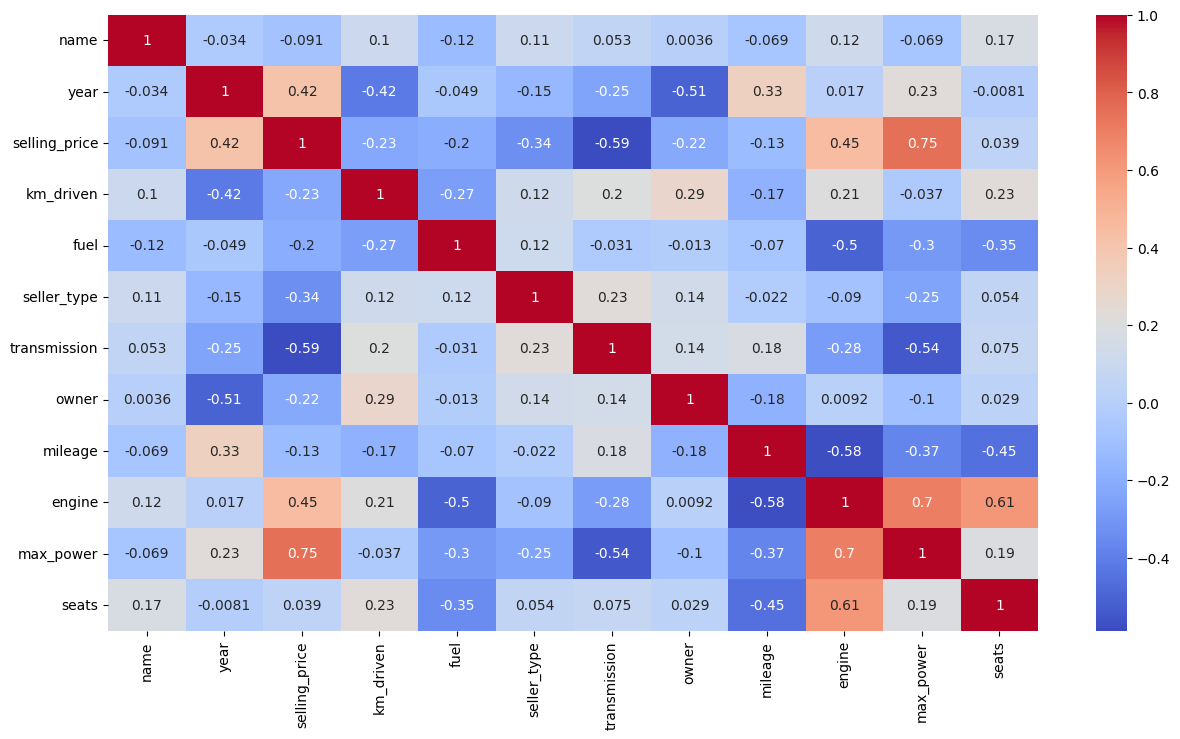

In [66]:
#correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Histogram of `selling_price`

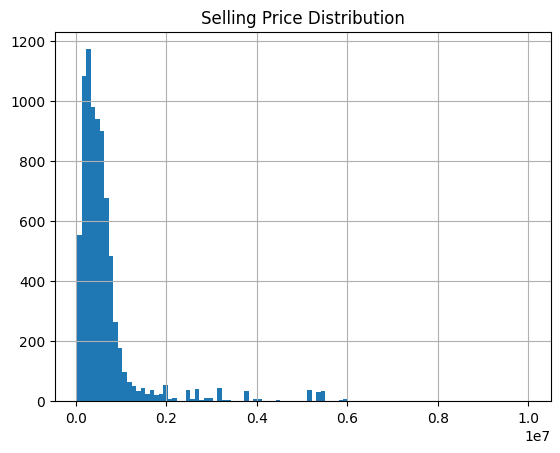

In [56]:
df['selling_price'].hist(bins=100)
plt.title('Selling Price Distribution')
plt.show()

#### Boxplot

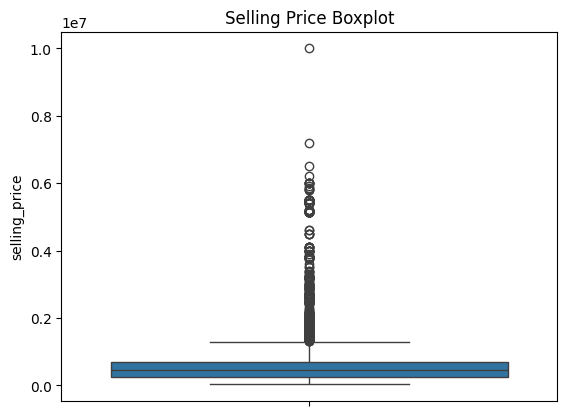

In [58]:
# using boxplot to identify any outliers
sns.boxplot(df['selling_price'])
plt.title('Selling Price Boxplot')
plt.show()


#### Distribution plot

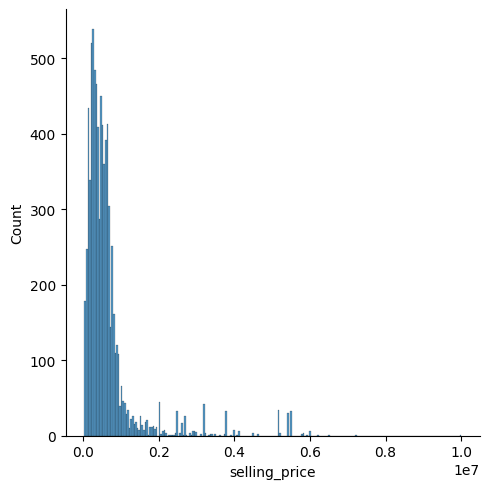

In [59]:
sns.displot(data = df, x = 'selling_price')

### Feature Selection
### In this section, we select the features (columns) from our dataset which will be used to train the model. The selection of features depends on multiple factors like the correlations, statistics and also some other logics.

In [16]:
#x is our features
# ignoring some feature like seller_type, transmission, owner and seats,
# as they dont seem that much important.
X = df[ ['name', 'year', 'km_driven', 'mileage', 'engine', 'max_power'] ]

# y is selling price (to be predicted).

# Applying a log transformation to the 'selling_price' column to scale down its large values. 
# makes the distribution better and reduces the impact of outliers.

y = np.log(df['selling_price'])
X.shape, y.shape

((8033, 6), (8033,))

### Train Test Split

In [17]:
# Spliting into 20% test adn 80% test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

In [18]:
# checking for null, missing values in training set.
X_train.isna().sum()

name           0
year           0
km_driven      0
mileage      171
engine       171
max_power    167
dtype: int64

In [19]:
# checking for null, missing values in test set.
X_test.isnull().sum()

name          0
year          0
km_driven     0
mileage      43
engine       43
max_power    41
dtype: int64

### Handling Null and Missing Values
#### Lets check for the skewness of the features mileage, engine and maxpower using histplot and use scipy to confirm it.   

<Axes: xlabel='engine', ylabel='Count'>

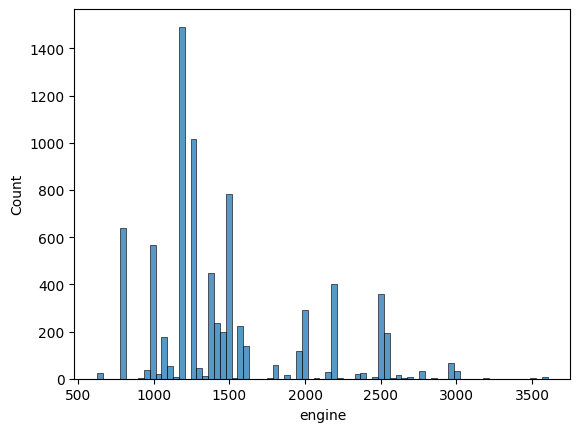

In [20]:
sns.histplot(data=df, x='engine')

### The distribution of the feature `engine` looks right skewed. Lets confirm it by using scipy

In [21]:

from scipy.stats import skew

skewness = skew(df['engine'].dropna())
print(f"Skewness of ENGINE: {skewness}")

Skewness of ENGINE: 1.1243926530777832


<Axes: xlabel='mileage', ylabel='Count'>

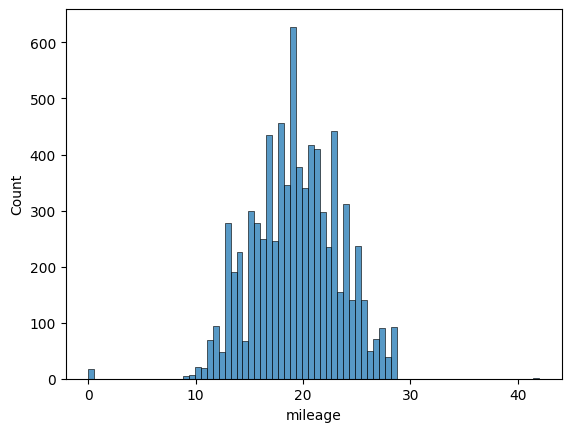

In [22]:
sns.histplot(data=df, x='mileage')

In [65]:
from scipy.stats import skew

skewness = skew(df['mileage'].dropna())
print(f"Skewness of MILEAGE: {skewness}")

# the distribution shows only a slight skewness or almost close to normal distribution.
# So replacing with mean or median really doesnt matter here.

Skewness of MILEAGE: -0.17239599936216496


<Axes: xlabel='max_power', ylabel='Count'>

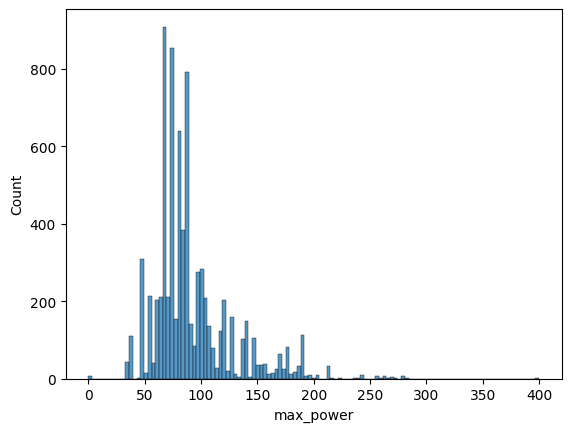

In [24]:
sns.histplot(data=df, x='max_power')

In [25]:
from scipy.stats import skew

skewness = skew(df['max_power'].dropna())
print(f"Skewness of MAX_POWER: {skewness}")

# the distribution shows a huge skewness.
# so missing na values must be replaced with median for max_power

Skewness of MAX_POWER: 1.6167922787880433


In [26]:
## mileage seems to have a close to a normal distribution. so replace NA values with Mean.
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


## these features seem to have a skewed distribution. So replace NA with Median.
skewed_features = ["engine", "max_power"]
for _feat in skewed_features:
    X_train[_feat].fillna(X_train[_feat].median(), inplace=True)

In [27]:
#Filling test set with the training distribution.

X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

skewed_features_test = ["engine", "max_power"]
for _feat in skewed_features_test:
    X_test[_feat].fillna(X_train[_feat].median(), inplace=True)

In [28]:
#for missing y,  you don't replace them, you just delete them.
#don't forget to delete the associated x values as well
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

In [29]:
# Make sure all values dont have missing or NA values
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

name         0
year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64
name         0
year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64
0
0


In [30]:
X_train.head(3)

,name,year,km_driven,mileage,engine,max_power
3791,4,2013,56315,25.44,936.0,57.60
2110,20,2016,110000,23.20,1248.0,73.94
1791,19,2015,57000,15.40,1997.0,120.00


### Scaling
### Standardizing the features using StandardScaler. This scales the data to have a mean of 0 and a standard deviation of 1, which is essential for algorithms that are sensitive to the magnitude of features.

In [34]:
# scaling helps in convergence faster. so 
# using standard scalar to scale our train test data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test  = ss.transform(X_test)

In [35]:
# Save the scaler model for later use in website

import joblib
joblib.dump(ss, "../app/model/scaler.pkl")

['../app/model/scaler.pkl']

### Model Selection

### Using three algorithms namely Linear Regression, Random Forest Regressor and SVR. But the model will be made with the best one only.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), RandomForestRegressor(n_estimators = 100, random_state = 66)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "Random-Forest Regressor"]

### Cross Validation with K-fold


In [37]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.09707973 -0.09668267 -0.10577886 -0.10093687 -0.10977231]; Mean: -0.1020500869035396
SVR - Score: [-0.06312756 -0.06421286 -0.06234137 -0.05956678 -0.06328064]; Mean: -0.0625058431858855
Random-Forest Regressor - Score: [-0.04997396 -0.05440829 -0.04652728 -0.04686056 -0.04626231]; Mean: -0.04880647941747025


#### Random forest edges out from the rest. So we can now use Grid Search to fine-tune hyper parameters. Basically it is a exhaustive search among all the given parameters that finds out the best result using the algorithm.

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, 15, 20, 25, None],
              'n_estimators': [5, 8, 12, 15, 20, 25, 30]}

rf = RandomForestRegressor(random_state = 21)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=21), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [5, 10, 15, 20, 25, None],
                         'n_estimators': [5, 8, 12, 15, 20, 25, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 30}

In [40]:
#best score of grid search
best_mse = grid.best_score_
best_mse

np.float64(-0.047205040225450495)

### Testing

### So now we got our grid search and found the best model, lets test mse and r2 score of the model.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = grid.predict(X_test)
print("MSE is", mean_squared_error(y_test, yhat))

print("R2 score is", r2_score(y_test, yhat))

MSE is 0.04874619393783692
R2 score is 0.9324111602324742


### Feature Importance

In [42]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.02018024, 0.45649412, 0.02678635, 0.02309675, 0.04905319,
       0.42438936])

<BarContainer object of 6 artists>

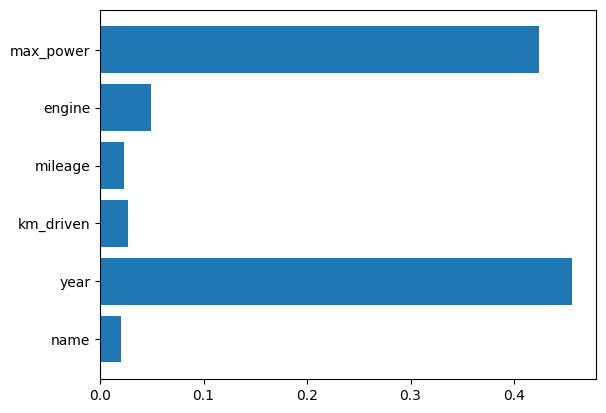

In [43]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

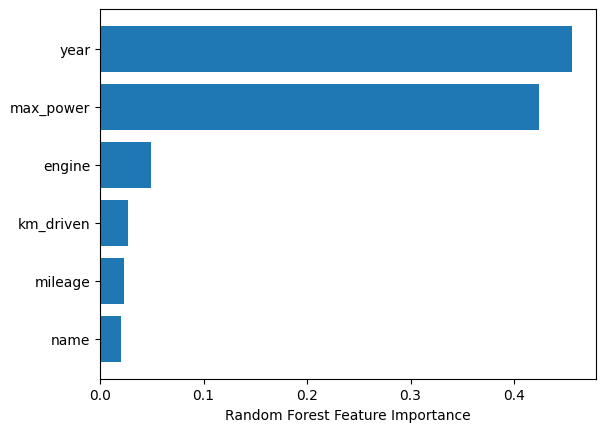

In [44]:
# let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

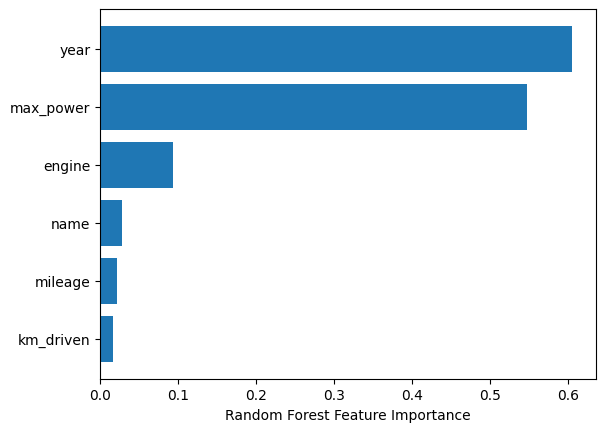

In [45]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Inference
### To provide inference service or deploy, it's best to save the model for latter use.

In [46]:
import joblib

# save the model to disk
filename = '../app/model/car_price_predictor'
joblib.dump(grid, filename)

['../app/model/car_price_predictor']

### Using the saved model to predict.

In [47]:
# load the model from disk
loaded_model = joblib.load(filename)

In [50]:
# check for 1st row of X_train data.
sample = X_train[0:1]
pred_selling_price = loaded_model.predict(sample)

#convert back to original scale using exponential.
np.exp(pred_selling_price)

array([177584.98034168])